<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
from __future__ import print_function

# Plotting with `matplotlib`

The most common facility for plotting with the Python numerical suite is to use the `matplotlib` package.  We will cover a few of the basic approaches to plotting figures.  If you are interested in learning more about `matplotlib` or are looking to see how you might create a particular plot check out the matplotlib [gallery](http://matplotlib.org/gallery) for inspiration.

## Interfaces

There are two primary ways to interface with the plotting facilities in `matplotlib`
 - Influenced by `MATLAB`, a procedural interface and
 - An object oriented interface

In [2]:
%matplotlib notebook
import numpy
import matplotlib.pyplot as plt

These commands import the necessary functions for NumPy and `matplotlib` for our demos.  The first command is so that the IPython notebook will make our plots and display them in the notebook.

### Basics
First off, lets plot a simple quadratic function $f(x) = x^2 + 2x + 3$:

<IPython.core.display.Javascript object>


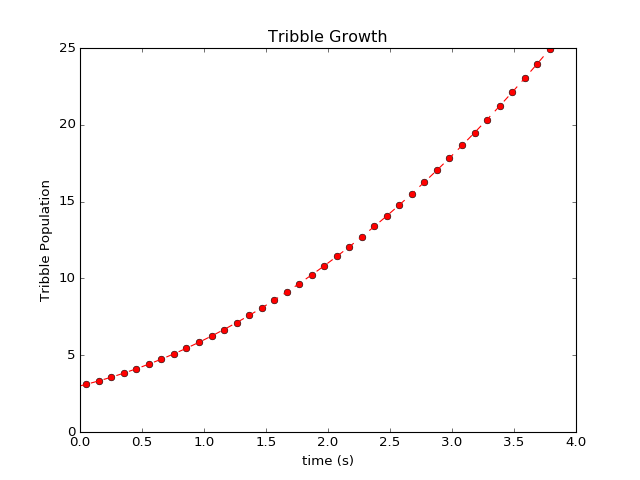

In [3]:
x = numpy.linspace(-5, 5, 100)
# print x
y = x**2 + 2 * x + 3
# print y
plt.plot(x, y, 'ro')
plt.show()

We can also label our plot (please do this), set the bounds and change the style of the plot:

<IPython.core.display.Javascript object>


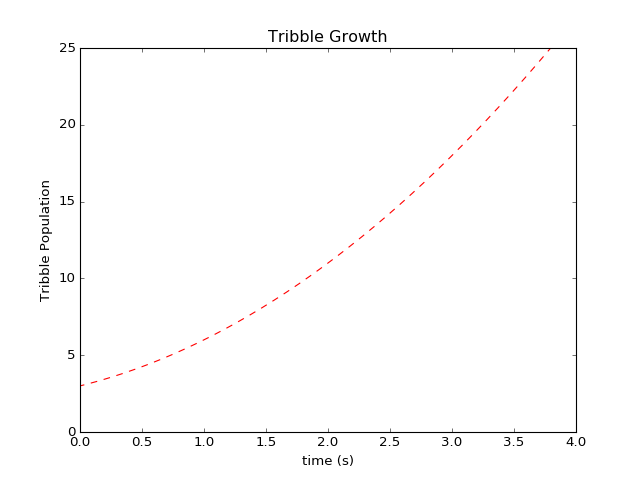

In [5]:
plt.plot(x, y, 'r--')
plt.xlabel("time (s)")
plt.ylabel("Tribble Population")
plt.title("Tribble Growth")
plt.xlim([0, 4])
plt.ylim([0, 25])
plt.show()

The othe major way to plot data is via a pseudo-color plot.  A pseudo-color plot takes 3-dimensional data (or 2-dimensional depending on how you look at it) and plots it using color to represent the values of the function.  Say we have a function $f(x, y)$, we can plot a pseudo-color by using the following commands.

<IPython.core.display.Javascript object>


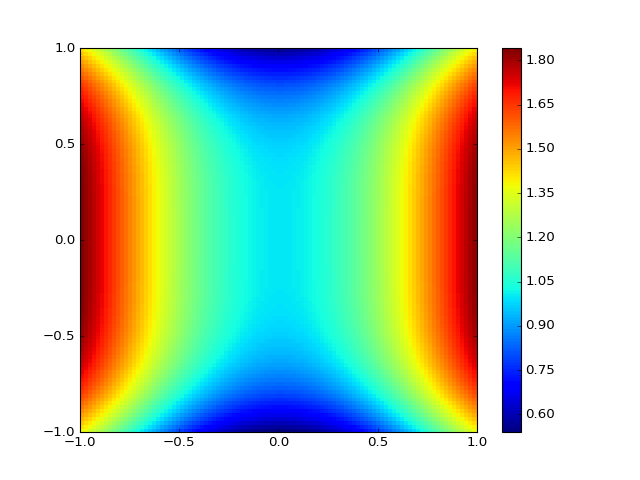

In [6]:
x = numpy.linspace(-1, 1, 100)
y = numpy.linspace(-1, 1, 100)
X, Y = numpy.meshgrid(x, y)
F = numpy.sin(X**2) + numpy.cos(Y**2)
plt.pcolor(X, Y, F)
plt.colorbar()
plt.show()

Here we have used a new way to create NumPy `ndarray`s so that we can easily evaluate 2-dimensional functions.  The function `meshgrid` takes two 1-dimensional arrays and turns them into 2, 2-dimensional arrays whose matching indices will provide an easy to use set of arrays that can be evaluate 2-dimensional functions.

Now as pretty as this rainbow plot is, it does not actually communicate as effectively as it could.  This default colormap (a colormap is how we decide which values are colored which way) called "jet" is fairly ubiquitous in scientific and engineering visualization.  Unfortunately the jet colormap tends to emphasize only certain parts of the range of values.  I highly suggest looking at [this explanation of how to choose a colormap](http://matplotlib.org/users/colormaps.html) if you are interested.  The bottom line is, do not use jet if you can help it.

Anyway, let us make this plot also more useful.

<IPython.core.display.Javascript object>


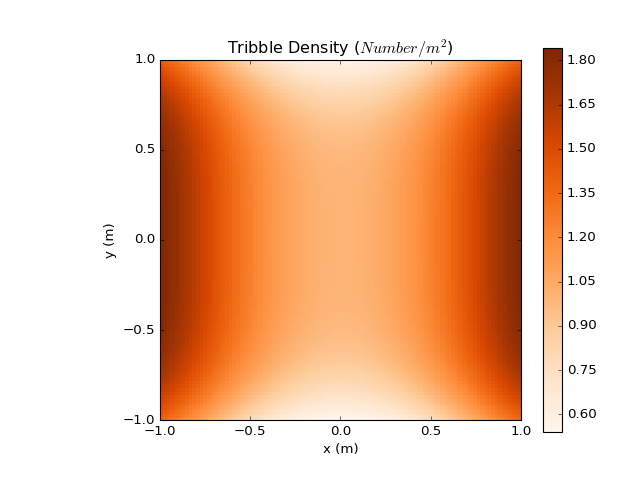

In [7]:
color_map = plt.get_cmap("Oranges")
plt.gcf().set_figwidth(plt.gcf().get_figwidth() * 2) 
plt.subplot(1, 2, 1, aspect="equal")
plt.pcolor(X, Y, F, cmap=color_map)

plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Tribble Density ($Number/m^2$)")

plt.subplot(1, 2, 2, aspect="equal")
plt.pcolor(X, Y, X*Y, cmap=plt.get_cmap("RdBu"))
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Tribble Birth Rate")
plt.colorbar()

plt.autoscale(enable=True, tight=False)
plt.show()

## Object-Oriented Interface

A much better way to "build" plots is to use a more object-oriented approach.  In this case, we create the objects and manipulate them which allows us to have more control over how we create plots.  Here we will create the annotated plots so that we have examples on how to do the same things (notice that they are very similar).  The basic premise of this approach is that you generate objects that can be manipulated and remain persistent.

<IPython.core.display.Javascript object>


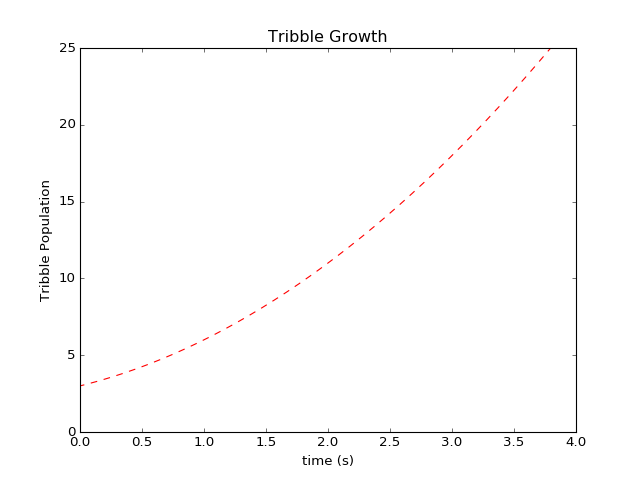

(0, 25)

In [9]:
x = numpy.linspace(-5, 5, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
growth_curve = axes.plot(x, x**2 + 2 * x + 3, 'r--')
axes.set_xlabel("time (s)")
axes.set_ylabel("Tribble Population")
axes.set_title("Tribble Growth")
axes.set_xlim([0, 4])
axes.set_ylim([0, 25])

Here is the other example with a few extra tricks added in.

<IPython.core.display.Javascript object>


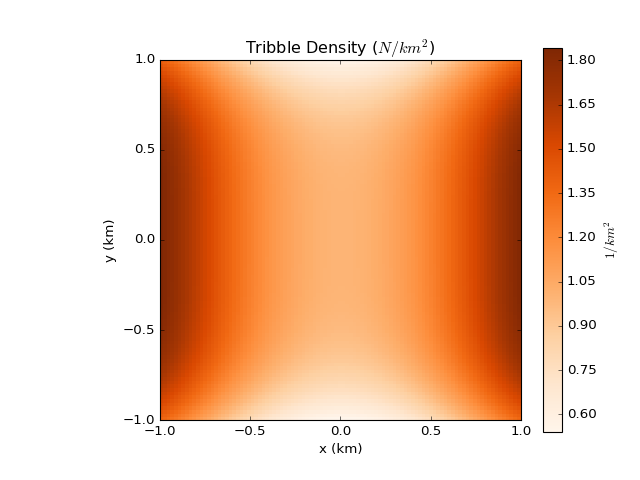

In [8]:
x = numpy.linspace(-1, 1, 100)
y = numpy.linspace(-1, 1, 100)
X, Y = numpy.meshgrid(x, y)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1, aspect='equal')
tribble_density = axes.pcolor(X, Y, numpy.sin(X**2) + numpy.cos(Y**2), cmap=plt.get_cmap("Oranges"))
axes.set_xlabel("x (km)")
axes.set_ylabel("y (km)")
axes.set_title("Tribble Density ($N/km^2$)")
cbar = fig.colorbar(tribble_density, ax=axes)
cbar.set_label("$1/km^2$")

axes = fig.add_subplot(1, 2, 2, aspect='equal')
klingon_population_density = axes.pcolor(X, Y, X * Y + 1, cmap=plt.get_cmap("RdBu"))
axes.set_xlabel("x (km)")
axes.set_ylabel("y (km)")
axes.set_title("Tribble Birth Rate")
cbar = fig.colorbar(klingon_population_density, ax=axes)
cbar.set_label("Number (thousands)")

plt.show()

Make sure to visit (matplotlib.org) for all sorts of other hints, tricks, and documentation.